In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support

In [2]:
def modelnb(trdata,tract,tsdata):
    model = GaussianNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

In [3]:
def modellr(trdata,tract,tsdata):
    model = LogisticRegression(C=1e5,max_iter=10000,random_state=1)
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

In [4]:
def modelann(trdata,tract,tsdata):
    model = MLPClassifier()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

In [5]:
def modelsvm(trdata,tract,tsdata):
    model =SVC(kernel = 'rbf')
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

In [6]:
def modelfld(trdata,tract,tsdata):
    model =LinearDiscriminantAnalysis(n_components=1)
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

In [7]:
def modelper(trdata,tract,tsdata):
    model = Perceptron(tol=1e-4, max_iter=100000)
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

In [8]:
fname='/Users/durbasatpathi/Documents/ml/a2/dataset_comb.csv'
df=pd.read_csv(fname,delimiter=',')
for column in df.columns:
    if column!='Class':
        maxx = df[column].max()
        minn = df[column].min()
        for e in df[column]:
            e1 = (maxx - e)/(maxx - minn)
            df[column] = df[column].replace(e, e1)
    elif column == 'Class':
        for e in df[column]:
            if e == 'jasmine':
                df[column] = df[column].replace(e, 0)
            elif e == 'Gonen':
                df[column] = df[column].replace(e, 1)

a1=np.zeros(7)
f1=np.zeros(7)
#in1=np.where(data[:,-1]>0)
#    data[in1[0],-1]=1
kf = KFold(7)
df=df.iloc[:,1:]
df=df.sample(frac=1)
data=df.to_numpy()

a=0
f=[]
predvalue=np.zeros((np.shape(data)[0]))
acc=np.zeros((6,7))
print('Naive Bayes')
i=0
for train_index, test_index in kf.split(data):
    trdata=data[train_index,0:-1]
    tsdata=data[test_index,0:-1]
    tract=data[train_index,-1]
    tract=tract.astype('int')
    tsact=data[test_index,-1]
    tsact=tsact.astype('int')
    predvalue[test_index]=modelnb(trdata,tract,tsdata)
    print('Fold ',i,'Accuracy-',accuracy_score(tsact,predvalue[test_index]),' F1 Score-',f1_score(tsact,predvalue[test_index]))
    a+=accuracy_score(tract,modelnb(trdata,tract,trdata))
    f.append(precision_recall_fscore_support(tract,modelnb(trdata,tract,trdata)))
    a1[i]=accuracy_score(tsact,predvalue[test_index])
    f1[i]=f1_score(tsact,predvalue[test_index])
    i+=1
print(a/7)
print(np.array(f))
a2=np.zeros(7)
f2=np.zeros(7)
i=0
a=0
f=[]
print('Logistic Regression')
for train_index, test_index in kf.split(data):
    trdata=data[train_index,0:-1]
    tsdata=data[test_index,0:-1]
    tract=data[train_index,-1]
    tract=tract.astype('int')
    tsact=data[test_index,-1]
    tsact=tsact.astype('int')
    predvalue[test_index]=modellr(trdata,tract,tsdata)
    print('Fold ',i,'Accuracy-',accuracy_score(tsact,predvalue[test_index]),' F1 Score-',f1_score(tsact,predvalue[test_index]))
    a+=accuracy_score(tract,modellr(trdata,tract,trdata))
    f.append(precision_recall_fscore_support(tract,modellr(trdata,tract,trdata)))
    a2[i]=accuracy_score(tsact,predvalue[test_index])
    f2[i]=f1_score(tsact,predvalue[test_index])
    i+=1
print(a/7)
print(np.array(f))
a=0
f=[]
a3=np.zeros(7)
f3=np.zeros(7)
i=0
print('Artificial Neural Networks')
for train_index, test_index in kf.split(data):
    trdata=data[train_index,0:-1]
    tsdata=data[test_index,0:-1]
    tract=data[train_index,-1]
    tract=tract.astype('int')
    tsact=data[test_index,-1]
    tsact=tsact.astype('int')
    predvalue[test_index]=modelann(trdata,tract,tsdata)
    print('Fold ',i,'Accuracy-',accuracy_score(tsact,predvalue[test_index]),' F1 Score-',f1_score(tsact,predvalue[test_index]))
    a3[i]=accuracy_score(tsact,predvalue[test_index])
    f3[i]=f1_score(tsact,predvalue[test_index])
    a+=accuracy_score(tract,modelann(trdata,tract,trdata))
    f.append(precision_recall_fscore_support(tract,modelann(trdata,tract,trdata)))
    i+=1
print(a/7)
print(np.array(f))


Naive Bayes
Fold  0 Accuracy- 0.9830638953040801  F1 Score- 0.9818031430934656
Fold  1 Accuracy- 0.9872979214780601  F1 Score- 0.9854175872735308
Fold  2 Accuracy- 0.9892224788298691  F1 Score- 0.9879621668099742
Fold  3 Accuracy- 0.9861431870669746  F1 Score- 0.9840989399293285
Fold  4 Accuracy- 0.9815242494226328  F1 Score- 0.9791485664639444
Fold  5 Accuracy- 0.9819091608929946  F1 Score- 0.9798887462558836
Fold  6 Accuracy- 0.9826723142087024  F1 Score- 0.9807445442875481
0.9846026921688511
[[[9.78944959e-01 9.92406542e-01]
  [9.93958406e-01 9.73638968e-01]
  [9.86394558e-01 9.82933179e-01]
  [8.60700000e+03 6.98000000e+03]]

 [[9.78067644e-01 9.92056615e-01]
  [9.93550657e-01 9.73084006e-01]
  [9.85748357e-01 9.82478724e-01]
  [8.52800000e+03 7.05900000e+03]]

 [[9.77918344e-01 9.91729541e-01]
  [9.93341121e-01 9.72676818e-01]
  [9.85569400e-01 9.82110784e-01]
  [8.56000000e+03 7.02700000e+03]]

 [[9.78080295e-01 9.92484463e-01]
  [9.93903869e-01 9.73076378e-01]
  [9.85928596e-01 

In [9]:
a4=np.zeros(7)
f4=np.zeros(7)
print('FLD')
i=0
a=0
f=[]
for train_index, test_index in kf.split(data):
    trdata=data[train_index,0:-1]
    tsdata=data[test_index,0:-1]
    tract=data[train_index,-1]
    tract=tract.astype('int')
    tsact=data[test_index,-1]
    tsact=tsact.astype('int')
    predvalue[test_index]=modelfld(trdata,tract,tsdata)
    print('Fold ',i,'Accuracy-',accuracy_score(tsact,predvalue[test_index]),' F1 Score-',f1_score(tsact,predvalue[test_index]))
    a4[i]=accuracy_score(tsact,predvalue[test_index])
    f4[i]=f1_score(tsact,predvalue[test_index])
    a+=accuracy_score(tract,modelfld(trdata,tract,trdata))
    f.append(precision_recall_fscore_support(tract,modelfld(trdata,tract,trdata)))
    i+=1
print(a/7)
print(np.array(f))    
a5=np.zeros(7)
f5=np.zeros(7)
print('SVM')
i=0
a=0
f=[]
for train_index, test_index in kf.split(data):
    trdata=data[train_index,0:-1]
    tsdata=data[test_index,0:-1]
    tract=data[train_index,-1]
    tract=tract.astype('int')
    tsact=data[test_index,-1]
    tsact=tsact.astype('int')
    predvalue[test_index]=modelsvm(trdata,tract,tsdata)
    print('Fold ',i,'Accuracy-',accuracy_score(tsact,predvalue[test_index]),' F1 Score-',f1_score(tsact,predvalue[test_index]))
    a5[i]=accuracy_score(tsact,predvalue[test_index])
    f5[i]=f1_score(tsact,predvalue[test_index])
    a+=accuracy_score(tract,modelsvm(trdata,tract,trdata))
    f.append(precision_recall_fscore_support(tract,modelsvm(trdata,tract,trdata)))
    i+=1
print(a/7)
print(np.array(f))

FLD
Fold  0 Accuracy- 0.9830638953040801  F1 Score- 0.9816971713810316
Fold  1 Accuracy- 0.985373364126251  F1 Score- 0.9831261101243339
Fold  2 Accuracy- 0.9880677444187836  F1 Score- 0.9866206301251619
Fold  3 Accuracy- 0.985373364126251  F1 Score- 0.9831261101243339
Fold  4 Accuracy- 0.9830638953040801  F1 Score- 0.9807186678352323
Fold  5 Accuracy- 0.9807544264819091  F1 Score- 0.9784853700516352
Fold  6 Accuracy- 0.9826723142087024  F1 Score- 0.9806784027479606
0.9840894492408359
[[[9.74353155e-01 9.96900369e-01]
  [9.97560125e-01 9.67621777e-01]
  [9.85820082e-01 9.82042893e-01]
  [8.60700000e+03 6.98000000e+03]]

 [[9.73895123e-01 9.96789727e-01]
  [9.97420263e-01 9.67700807e-01]
  [9.85517321e-01 9.82029902e-01]
  [8.52800000e+03 7.05900000e+03]]

 [[9.73426095e-01 9.96333773e-01]
  [9.97079439e-01 9.66842180e-01]
  [9.85110803e-01 9.81366460e-01]
  [8.56000000e+03 7.02700000e+03]]

 [[9.74009618e-01 9.96643806e-01]
  [9.97303634e-01 9.67833357e-01]
  [9.85518999e-01 9.82027318

In [10]:
a6=np.zeros(7)
f6=np.zeros(7)
a=0
f=[]
print('Perceptron')
i=0
for train_index, test_index in kf.split(data):
    trdata=data[train_index,0:-1]
    tsdata=data[test_index,0:-1]
    tract=data[train_index,-1]
    tract=tract.astype('int')
    tsact=data[test_index,-1]
    tsact=tsact.astype('int')
    predvalue[test_index]=modelper(trdata,tract,tsdata)
    print('Fold ',i,'Accuracy-',accuracy_score(tsact,predvalue[test_index]),' F1 Score-',f1_score(tsact,predvalue[test_index]))
    a6[i]=accuracy_score(tsact,predvalue[test_index])
    f6[i]=f1_score(tsact,predvalue[test_index])
    a+=accuracy_score(tract,modelper(trdata,tract,trdata))
    f.append(precision_recall_fscore_support(tract,modelper(trdata,tract,trdata)))
    i+=1
print(a/7)
print(np.array(f))

Perceptron
Fold  0 Accuracy- 0.9846035411855273  F1 Score- 0.9835526315789472
Fold  1 Accuracy- 0.9738260200153964  F1 Score- 0.9693417493237151
Fold  2 Accuracy- 0.9911470361816782  F1 Score- 0.990183525394793
Fold  3 Accuracy- 0.9661277906081601  F1 Score- 0.9626485568760611
Fold  4 Accuracy- 0.985373364126251  F1 Score- 0.9833916083916084
Fold  5 Accuracy- 0.9849884526558892  F1 Score- 0.9834254143646409
Fold  6 Accuracy- 0.9715055833654216  F1 Score- 0.9677137870855148
0.9793053719733382
[[[9.87167630e-01 9.90197492e-01]
  [9.92099454e-01 9.84097421e-01]
  [9.89627398e-01 9.87138033e-01]
  [8.60700000e+03 6.98000000e+03]]

 [[9.49020481e-01 9.99697107e-01]
  [9.99765478e-01 9.35118289e-01]
  [9.73732298e-01 9.66329966e-01]
  [8.52800000e+03 7.05900000e+03]]

 [[9.85487054e-01 9.89675939e-01]
  [9.91588785e-01 9.82211470e-01]
  [9.88528504e-01 9.85929576e-01]
  [8.56000000e+03 7.02700000e+03]]

 [[9.95899602e-01 9.31688553e-01]
  [9.39624853e-01 9.95323792e-01]
  [9.66944143e-01 9.6

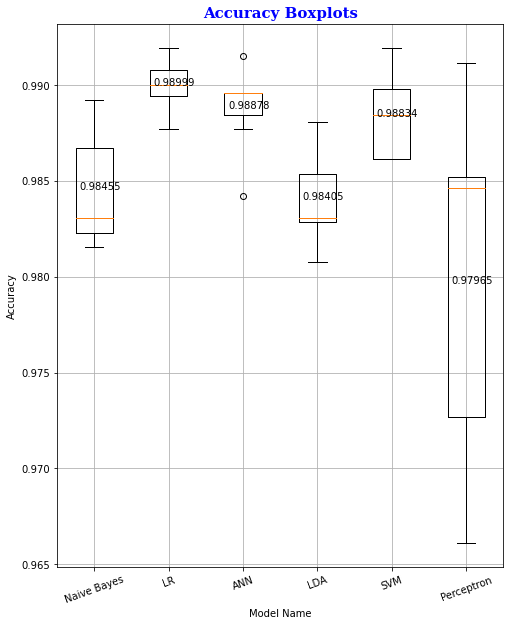

In [11]:
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize =(8,10))
    x=[]
    x.append(a1)
    x.append(a2)
    x.append(a3)
    x.append(a4)
    x.append(a5)
    x.append(a6)
    x=np.array(x)
    df=pd.DataFrame(x.T)
    labels=['Naive Bayes','LR','ANN','LDA','SVM','Perceptron']
    plt.boxplot(df)
    plt.text(0.80, np.mean(a1), str(round(np.mean(a1), 5)))
    plt.text(1.80, np.mean(a2), str(round(np.mean(a2), 5)))
    plt.text(2.80, np.mean(a3), str(round(np.mean(a3), 5)))
    plt.text(3.80, np.mean(a4), str(round(np.mean(a4), 5)))
    plt.text(4.80, np.mean(a5), str(round(np.mean(a5), 5)))
    plt.text(5.80, np.mean(a6), str(round(np.mean(a6), 5)))
    plt.xticks([1,2,3,4,5,6],labels,rotation = 20)
    font1 = {'family':'serif','color':'blue','size':15}
    plt.title('Accuracy Boxplots', fontdict = font1,fontweight='bold')
    plt.ylabel("Accuracy")
    plt.xlabel("Model Name")
    plt.grid()
    plt.show()

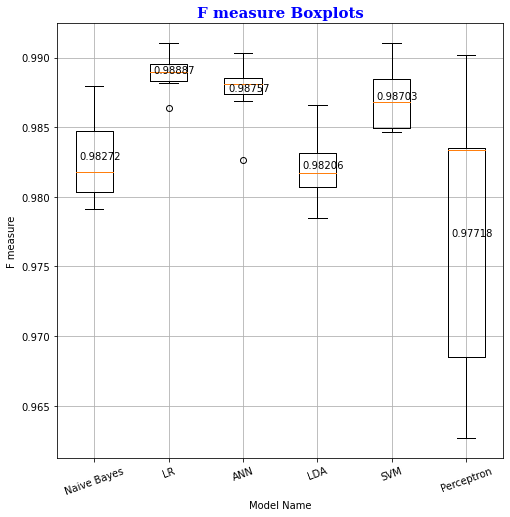

In [12]:

    import matplotlib.pyplot as plt
    fig = plt.figure(figsize =(8,8))
    x=[]
    x.append(f1)
    x.append(f2)
    x.append(f3)
    x.append(f4)
    x.append(f5)
    x.append(f6)
    x=np.array(x)
    df=pd.DataFrame(x.T)
    labels=['Naive Bayes','LR','ANN','LDA','SVM','Perceptron']
    plt.boxplot(df)
    plt.text(0.80, np.mean(f1), str(round(np.mean(f1), 5)))
    plt.text(1.80, np.mean(f2), str(round(np.mean(f2), 5)))
    plt.text(2.80, np.mean(f3), str(round(np.mean(f3), 5)))
    plt.text(3.80, np.mean(f4), str(round(np.mean(f4), 5)))
    plt.text(4.80, np.mean(f5), str(round(np.mean(f5), 5)))
    plt.text(5.80, np.mean(f6), str(round(np.mean(f6), 5)))
    plt.xticks([1,2,3,4,5,6],labels,rotation = 20)
    font1 = {'family':'serif','color':'blue','size':15}
    plt.title('F measure Boxplots', fontdict = font1,fontweight='bold')
    plt.ylabel("F measure")
    plt.xlabel("Model Name")
    plt.grid()
    plt.show()

In [22]:
print(np.mean(a1))
print(np.mean(a2))
print(np.mean(a3))
print(np.mean(a4))
print(np.mean(a5))
print(np.mean(a6))

0.9845476010290449
0.9899917512618613
0.9887820083244544
0.9840527148528654
0.9883419189404689
0.979653112591189


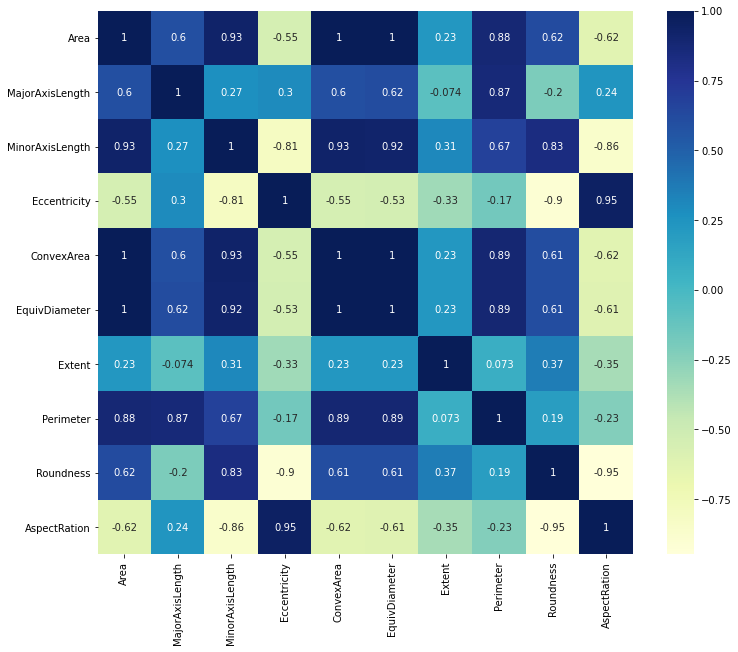

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np
%matplotlib inline
fname='/Users/durbasatpathi/Documents/ml/a2/dataset_comb.csv'
df=pd.read_csv(fname,delimiter=',')
df.loc[df['Class']=='jasmine','Class'] =0
df.loc[df['Class']=='Gonen','Class'] =1
df.drop('id', inplace=True, axis=1)
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

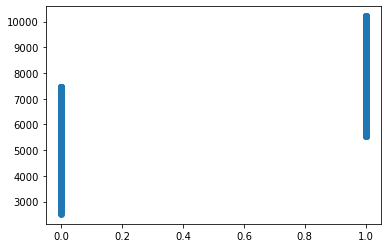

In [15]:
f1=df['Area']
cl=df['Class']
plt.scatter(cl,f1)
plt.show()

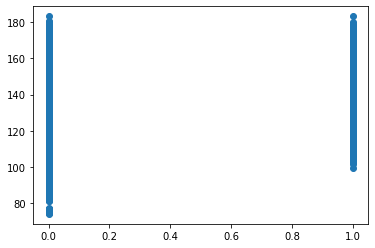

In [16]:
f1=df['MajorAxisLength']
cl=df['Class']
plt.scatter(cl,f1)
plt.show()

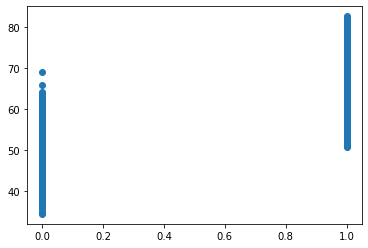

In [17]:
f1=df['MinorAxisLength']
cl=df['Class']
plt.scatter(cl,f1)
plt.show()

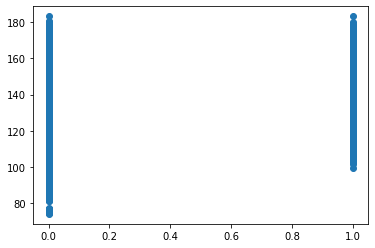

In [18]:
f1=df['MajorAxisLength']
cl=df['Class']
plt.scatter(cl,f1)
plt.show()

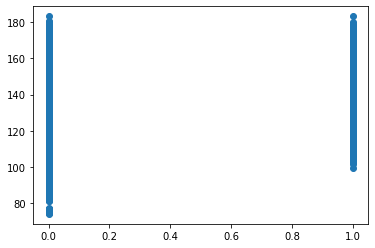

In [19]:
f1=df['MajorAxisLength']
cl=df['Class']
plt.scatter(cl,f1)
plt.show()

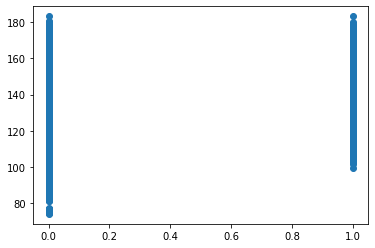

In [20]:
f1=df['MajorAxisLength']
cl=df['Class']
plt.scatter(cl,f1)
plt.show()

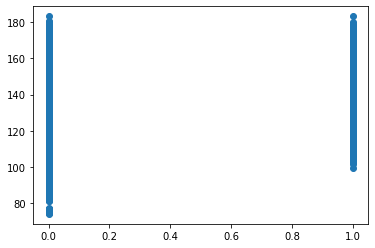

In [21]:
f1=df['MajorAxisLength']
cl=df['Class']
plt.scatter(cl,f1)
plt.show()